 # Olympics Project

[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_Olympic = pd.read_csv('/content/drive/My Drive/Projects_shai/Projects data/Olympic.csv')  # From My Drive

In [4]:
df_Olympic.shape

(271116, 15)

### Drop duplicates row

In [5]:
df_Olympic.drop_duplicates(inplace=True)  # Drop duplicates row and modify dataFrame

In [6]:
df_Olympic.shape

(269731, 15)

In [7]:
df_Olympic['ID'] = df_Olympic['ID'].astype(str)  # Convert ID to string
df_Olympic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  object 
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 32.9+ MB


In [8]:
df_Olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Find the missing data in each column

In [9]:
 df_Olympic.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9315
Height,58814
Weight,61527
Team,0
NOC,0
Games,0
Year,0


### Number of males and females

In [10]:
df_Olympic['Sex'].value_counts()

,count
Sex,
M,195353
F,74378


### How many cities do we have and what are they ?

In [11]:
df_Olympic['City'].value_counts()

,count
City,
London,22297
Athina,15556
Sydney,13821
Atlanta,13780
Rio de Janeiro,13688
Beijing,13602
Barcelona,12977
Seoul,12037
Los Angeles,11919


### Find the number of athlete for each year

In [12]:
df_Olympic['Year'].value_counts().sort_index()

,count
Year,
1896,380
1900,1898
1904,1301
1906,1733
1908,3069
1912,4040
1920,4292
1924,5570
1928,5238


### Which athlete participated the most? (his/her name and ID)

In [13]:
# Get the athlete with the highest participation count
df_Olympic.groupby(['ID']).size().nlargest(1).reset_index(name='Participation_Count').style.hide()

ID,Participation_Count
106296,39


### Find the number of each medal for each year.
##### The output should look like this
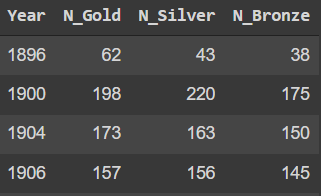

In [14]:
# Count medals by year and medal type, filling missing values with 0
medal_counts = df_Olympic.groupby('Year')['Medal'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
medal_counts = medal_counts.rename(columns={'Gold': 'N_Gold', 'Silver': 'N_Silver', 'Bronze': 'N_Bronze'})

# Reset index to turn 'Year' into a column
medal_counts = medal_counts.reset_index()

# Show only 'Year', 'N_Gold', 'N_Silver', and 'N_Bronze' columns without the index
medal_counts[['Year', 'N_Gold', 'N_Silver', 'N_Bronze']].style.hide()


Year,N_Gold,N_Silver,N_Bronze
1896,62,43,38
1900,198,220,175
1904,173,163,150
1906,157,156,145
1908,294,281,256
1912,326,315,300
1920,493,448,367
1924,332,319,311
1928,275,267,281
1932,261,246,232


### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

In [15]:
df_count_win_Gold = df_Olympic[df_Olympic['Medal']=='Gold'].groupby('City').count()['Medal'].reset_index()
df_count_win_Gold.head().style.hide()

City,Medal
Albertville,104
Amsterdam,245
Antwerpen,493
Athina,883
Atlanta,608


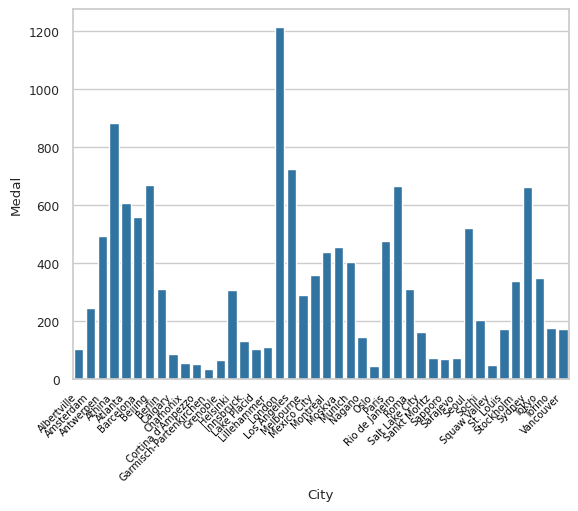

In [16]:

sns.set_context("notebook", font_scale=0.8)
sns.set_style("whitegrid")

ax = sns.barplot(x='City', y='Medal', data=df_count_win_Gold)

plt.xticks(rotation=45, ha='right', fontsize=7, color='black')

plt.show()


### Find the total missing data for each year?

In [17]:
# Add a new column 'Missing' to count missing values for each row
df_Olympic['Missing'] = df_Olympic.isnull().sum(axis=1)

# Group data by 'Year' and sum the missing values for each year
missing_per_year = df_Olympic.groupby('Year')['Missing'].sum().reset_index()


In [18]:
missing_per_year.style.hide()

Year,Missing
1896,1065
1900,5676
1904,3331
1906,5022
1908,8057
1912,10018
1920,11175
1924,15194
1928,14124
1932,6308


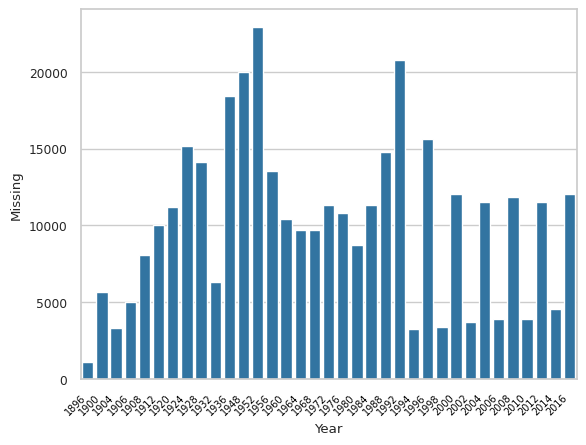

In [19]:
sns.set_context("notebook", font_scale=0.8)
sns.set_style("whitegrid")

ax = sns.barplot(x='Year', y='Missing', data=missing_per_year)

plt.xticks(rotation=45, ha='right', fontsize=7, color='black')

plt.show()

### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

In [20]:
# Group the Olympic data by 'Year' and 'Season', and count the number of athletes in each group
athletes_count = df_Olympic.groupby(['Year', 'Season']).size().unstack()  # Transform to a pivot table format
athletes_count.head()

Season,Summer,Winter
Year,,
1896,380.0,NaN
1900,1898.0,NaN
1904,1301.0,NaN
1906,1733.0,NaN
1908,3069.0,NaN


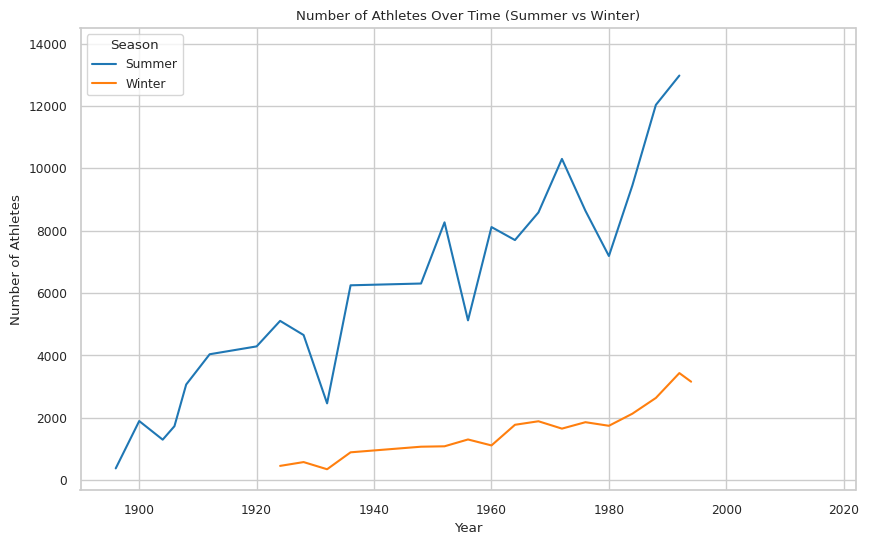

In [21]:
athletes_count.plot(kind='line', figsize=(10, 6))
plt.title('Number of Athletes Over Time (Summer vs Winter)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()
